<a href="https://colab.research.google.com/github/injoon-pij/dlnlp-learning/blob/main/dlnlp_count_based_word_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1) Word representation

[단어의 표현 방법]

* 국소 표현(Local Representation) 방법 

 * 이산 표현(Discrete Representation) 방법

 * 해당 단어 그 자체만 보고, 특정값을 맵핑하여 단어를 
표현하는 방법

 * (ex) puppy(강아지), cute(귀여운), lovely(사랑스러운)라는 단어가 있을 때 각 단어에 1번, 2번, 3번 등과 같은 숫자를 맵핑(mapping)하여 부여

 * 단어의 의미, 뉘앙스는 표현할 수 없음

* 분산 표현(Distributed Representation) 방법

 * 연속 표현(Continuous Represnetation) 방법

 * 그 단어를 표현하고자 주변을 참고하여 단어를 표현하는 방법

 * (ex) puppy(강아지)라는 단어 근처에는 주로 cute(귀여운), lovely(사랑스러운)이라는 단어가 자주 등장하므로, puppy라는 단어는 cute, lovely한 느낌이다로 단어를 정의

 * 단어의 의미, 뉘앙스를 표현할 수 있음

cf.) LSA나 LDA와 같은 방법들은 단어의 의미를 표현할 수 있다는 점에서 연속 표현(Continuous Represnetation)이지만, 엄밀히 말해서 다른 접근의 방법론을 사용하고 있는 워드투벡터(Word2vec)와 같은 분산 표현(Distributed Representation)은 아닌 것으로 분류하여 연속 표현을 분산 표현을 포괄하고 있는 더 큰 개념으로 설명하기도 함.

[단어 표현 카테고리]

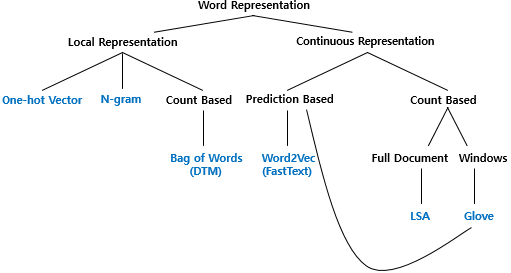

# 2) Bag of Words(BoW)

* 단어들의 순서는 전혀 고려하지 않고, 단어들의 출현 빈도에만 집중하는 텍스트 데이터의 수치화 표현 방법 

* BoW를 만드는 과정
 1. 각 단어에 고유한 정수 인덱스를 부여
 2. 각 인덱스의 위치에 단어 토큰의 등장 횟수를 기록한 벡터를 만듬

In [ ]:
pip install konlpy

In [ ]:
from konlpy.tag import Okt
import re

okt = Okt()

In [ ]:
# 정규 표현식을 통해 온점 제거
token = re.sub("(\.)","","정부가 발표하는 물가상승률과 소비자가 느끼는 물가상승률은 다르다.")
# tokenization  
token = okt.morphs(token)
print(token)

word2index = {}  
bow = []

# Bow 만들기
for voca in token:
  if voca not in word2index.keys():  
    word2index[voca] = len(word2index)
    bow.append(1)
  else:
    index = word2index[voca]
    bow[index] = bow[index] + 1

print(word2index)
print(bow)  

['정부', '가', '발표', '하는', '물가상승률', '과', '소비자', '가', '느끼는', '물가상승률', '은', '다르다']
{'정부': 0, '가': 1, '발표': 2, '하는': 3, '물가상승률': 4, '과': 5, '소비자': 6, '느끼는': 7, '은': 8, '다르다': 9}
[1, 2, 1, 1, 2, 1, 1, 1, 1, 1]


* BoW에 있어서 중요한 것은 단어의 등장 빈도. 단어의 순서, 즉 인덱스의 순서는 전혀 상관없음

* BoW는 각 단어가 등장한 횟수를 수치화하는 텍스트 표현 방법이기 때문에, 주로 어떤 단어가 얼마나 등장했는지를 기준으로 문서가 어떤 성격의 문서인지를 판단하는 작업에 쓰임. 즉, 분류 문제나 여러 문서 간의 유사도를 구하는 문제에 주로 쓰임.
 * 예를 들어 '달리기', '체력', '근력'과 같은 단어가 자주 등장하면 해당 문서를 체육 관련 문서로 , '미분', '방정식', '부등식'과 같은 단어가 자주 등장한다면 수학 관련 문서로 분류할 수 있음

## CountVectorizer

단어의 빈도를 카운트하여 벡터로 만드는 사이킷런 클래스

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['you know I want your love. because I love you.']
vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지

[[1 1 2 1 2 1]]
{'you': 4, 'know': 1, 'want': 3, 'your': 5, 'love': 2, 'because': 0}


* 'I'는 BoW를 만드는 과정에서 사라졌는데, 이는 CountVectorizer가 기본적으로 길이가 2 이상인 문자에 대해서만 토큰으로 인식하기 때문

* CountVectorizer는 단지 띄어쓰기만을 기준으로 단어를 자르는 낮은 수준의 토큰화를 진행하고 BoW를 만들기 때문에 한국어의 경우엔 CountVectorizer를 적용하면, 조사 등의 이유로 제대로 BoW가 만들어지지 않을 확률이 높음
 * 예를 들어 띄어쓰기를 기준으로 분리한 뒤에 나온 '물가상승률과'와 '물가상승률은'은 조사를 포함해서 하나의 단어로 판단하기 때문에 서로 다른 단어로 인식하고 두 단어는 각자 다른 인덱스에서 1이라는 빈도의 값을 갖게 됨

---

[불용어를 제거한 BoW 만들기]
* 각 단어에 대한 빈도수를 수치화하는 것은 결국 텍스트 내에서 어떤 단어들이 중요한지를 보고싶다는 의미를 함축함
* 따라서 BoW를 만들때 불용어를 제거하는 일은 자연어처리의 정확도를 높이기 위해서 선택할 수 있는 전처리 기법

In [ ]:
# Customized Stopwords list

from sklearn.feature_extraction.text import CountVectorizer

text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words=["the", "a", "an", "is", "not"])

print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[[1 1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 4, 'it': 3, 'everything': 0}


In [ ]:
# CountVectorizer Stopwords

from sklearn.feature_extraction.text import CountVectorizer

text = ["Family is not an important thing. It's everything."]
vect = CountVectorizer(stop_words = "english")

print(vect.fit_transform(text).toarray())
print(vect.vocabulary_)

[[1 1 1]]
{'family': 0, 'important': 1, 'thing': 2}


In [ ]:
# NLTK Stopwords

from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

text = ["Family is not an important thing. It's everything."]
sw = stopwords.words("english")
vect = CountVectorizer(stop_words = sw)

print(vect.fit_transform(text).toarray()) 
print(vect.vocabulary_)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[[1 1 1 1]]
{'family': 1, 'important': 2, 'thing': 3, 'everything': 0}


# 3) Document-Term Matrix(DTM)

* BoW 표현을 다수의 문서에 대해서 행렬로 표현한 문서-단어 행렬
 * 서로 다른 문서들의 BoW들을 결합한 표현 방법

 * 행과 열을 반대로 선택하면 TDM(Term-Document Matrix)

 * 각 문서에서 등장한 단어의 빈도를 행렬의 값으로 표기함
 
 * 문서-단어 행렬은 문서들을 서로 비교할 수 있도록 수치화할 수 있다는 점에서 의의를 가짐

(ex)

문서1 : 먹고 싶은 사과

문서2 : 먹고 싶은 바나나

문서3 : 길고 노란 바나나 바나나

문서4 : 저는 과일이 좋아요

[Document-Term Matrix]

|-     |과일이|길고|노란|먹고|바나나|사과|싶은|저는|좋아요|
|:----:|:----:|:--:|:--:|:--:|:----:|:--:|:--:|:--:|:----:|
|문서 1|0     |0   |0   |1   |0     |1   |1   |0   |0     |
|문서 2|0     |0   |0   |1   |1     |0   |1   |0   |0     |
|문서 3|0     |1   |1   |0   |2     |0   |0   |0   |0     |
|문서 4|1     |0   |0   |0   |0     |0   |0   |1   |1     |

[한계]

1. 희소 표현(Sparse representation)

 * DTM에서의 각 문서 벡터의 차원은 전체 단어 집합의 크기와 같기 때문에 전체 코퍼스가 방대한 데이터라면 문서 벡터의 차원은 수백만이 되거나 많은 문서 벡터의 대부분의 값이 0이 될 수 있음. 이러한 대부분의 값이 0인 희소 행렬(sparse matrix)은 많은 양의 저장 공간과 계산을 위한 리소스를 필요로 함.

 * 따라서 전처리를 통해 단어 집합의 크기를 줄이는 일은 BoW 표현을 사용하는 모델에서 중요

    * 구두점, 빈도수가 낮은 단어, 불용어 등 제거
     
    * 어간이나 표제어 추출을 통해 단어 정규화

2. 단순 빈도 수 기반 접근

 * 여러 문서에서 동일하게 불용어 'the'의 빈도수가 높다고 해서 이 문서들이 유사한 문서라고 판단할 수 없음

 * 따라서 불용어와 중요한 단어에 대해서 각각 가중치를 주는 방법 필요 -> TF-IDF

# 4) TF-IDF

Term Frequency-Inverse Document Frequency(TF-IDF) : 단어 빈도-역 문서 빈도

* DTM 내의 각 단어들마다 중요한 정도를 가중치로 주는 방법

* 문서 유사도를 구하는 작업, 검색 시스템에서 검색 결과의 중요도를 정하는 작업, 문서 내에서 특정 단어의 중요도를 구하는 작업 등에 쓰임

* TF(단어빈도)와 IDF(역 문서 빈도)를 곱한 값

 * tf(d,t) : 특정 문서 d에서의 특정 단어 t의 등장 횟수

 * df(t) : 특정 단어 t가 등장한 문서의 수

 * idf(d, t) : df(t)에 반비례하는 수 =  $log(\frac{n}{1+df(t)})$

   * 총 문서의 수 n이 커질 수록, IDF의 값은 기하급수적으로 커지게 되므로 log를 사용하여 역수를 취함

   * 불용어 등과 같이 자주 쓰이는 단어들을 자주 쓰이지 않는 희귀 단어들과 비교했을 때 희귀 단어들에 엄청난 가중치가 부여될 수 있는데, 로그를 씌우면 이런 격차를 줄이는 효과가 있음

   * log 안의 식에서 분모에 1을 더해주는 이유는 특정 단어가 전체 문서에서 등장하지 않을 경우에 분모가 0이 되는 상황을 방지하기 위한 것

* 모든 문서에서 자주 등장하는 단어는 중요도가 낮고, 특정 문서에서만 자주 등장하는 단어는 중요도가 높다고 판단함. 즉, TF-IDF 값이 낮으면 중요도가 낮은 것이며, TF-IDF 값이 크면 중요도가 큰 것임.

[연산 예시]

* 앞서 3)에서 구했던 Document-Term Matrix가 곧 각 문서에 대한 TF 값임

 * TF Matrix

|-     |과일이|길고|노란|먹고|바나나|사과|싶은|저는|좋아요|
|:----:|:----:|:--:|:--:|:--:|:----:|:--:|:--:|:--:|:----:|
|문서 1|0     |0   |0   |1   |0     |1   |1   |0   |0     |
|문서 2|0     |0   |0   |1   |1     |0   |1   |0   |0     |
|문서 3|0     |1   |1   |0   |2     |0   |0   |0   |0     |
|문서 4|1     |0   |0   |0   |0     |0   |0   |1   |1     |

* IDF를 구하기 위한 로그 연산에서의 로그를 자연 로그로 설정하고, 각 문서의 TF 값에 곱해주면 TF-IDF 행렬을 구할 수 있음

 * IDF

|단어	 |IDF(역 문서 빈도)     |
|:----:|:--------------------:|
|과일이|ln(4/(1+1)) = 0.693147|
|길고  |ln(4/(1+1)) = 0.693147|
|노란  |ln(4/(1+1)) = 0.693147|
|먹고  |ln(4/(2+1)) = 0.287682|
|바나나|ln(4/(2+1)) = 0.287682|
|사과  |ln(4/(1+1)) = 0.693147|
|싶은  |ln(4/(2+1)) = 0.287682|
|저는  |ln(4/(1+1)) = 0.693147|
|좋아요|ln(4/(1+1)) = 0.693147|

 * TF-IDF Matrix

|-     |과일이  |길고    |노란    |먹고    |바나나  |사과    |싶은    |저는    |좋아요|
|:----:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
|문서 1|0       |0       |0       |0.287682|0       |0.693147|0.287682|0       |0       |
|문서 2|0       |0       |0       |0.287682|0.287682|0       |0.287682|0       |0       |
|문서 3|0       |0.693147|0.693147|0       |0.575364|0       |0       |0       |0       |
|문서 4|0.693147|0       |0       |0       |0       |0       |0       |0.693147|0.693147|

 * 문서2에서의 '바나나'의 TF-IDF 가중치와 문서3에서의 '바나나'의 TF-IDF 가중치가 다름.
  * TF-IDF에서의 관점에서 보자면 TF-IDF는 특정 문서에서 자주 등장하는 단어는 그 문서 내에서 중요한 단어로 판단하는데, 문서2에서는 바나나를 한 번 언급했지만, 문서3에서는 바나나를 두 번 언급했으므로 문서3에서의 바나나를 더욱 중요한 단어라고 판단한 것

## TF-IDF by python

In [1]:
import pandas as pd
from math import log

In [4]:
docs = [
  '먹고 싶은 사과',
  '먹고 싶은 바나나',
  '길고 노란 바나나 바나나',
  '저는 과일이 좋아요'
] 

vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort() # 가나다 순 정렬

['노란', '먹고', '사과', '바나나', '싶은', '좋아요', '길고', '저는', '과일이']
['과일이', '길고', '노란', '먹고', '바나나', '사과', '싶은', '저는', '좋아요']


In [5]:
N = len(docs) # 총 문서의 수

def tf(t, d):
  return d.count(t)

def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  
  return log(N/(df + 1))

def tfidf(t, d):
  return tf(t,d)* idf(t)

In [9]:
# TF matrix
result = []

for i in range(N):
  d = docs[i]
  d_tf = [tf(vocab[j], d) for j in range(len(vocab))]
  result.append(d_tf)

tf_ = pd.DataFrame(result, columns = vocab)
tf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [7]:
# IDF
result = []

for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_ = pd.DataFrame(result, index = vocab, columns = ["IDF"])
idf_

,IDF
과일이,0.693147
길고,0.693147
노란,0.693147
먹고,0.287682
바나나,0.287682
사과,0.693147
싶은,0.287682
저는,0.693147
좋아요,0.693147


In [10]:
# TF-IDF(tf_ * idf_)
result = []

for i in range(N):
  d = docs[i]
  d_tfidf = [tfidf(vocab[j], d) for j in range(len(vocab))]
  result.append(d_tfidf)

tfidf_ = pd.DataFrame(result, columns = vocab)
tfidf_

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0.000000,0.000000,0.000000,0.287682,0.000000,0.693147,0.287682,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.287682,0.287682,0.000000,0.287682,0.000000,0.000000
2,0.000000,0.693147,0.693147,0.000000,0.575364,0.000000,0.000000,0.000000,0.000000
3,0.693147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.693147


TF-IDF 구현을 제공하고 있는 많은 패키지들은 패키지마다 식이 조금씩 다르긴 하지만, 위에서 배운 기본 식에서 조정된 식을 사용함.

 * 기본적인 식을 바탕으로 한 구현에도 여전히 문제점이 존재하기 때문

   * 만약 전체 문서의 수 $n$ 이 4인데 $df(t)$의 값이 3인 경우, log항의 분자와 분모의 값이 같아져 $idf(d, t)$ 의 값이 0이 됨

   * IDF의 값이 0이라면 더 이상 가중치의 역할을 수행하지 못함

 * 실제 구현체의 경우 $idf(d, t) = log(n/(df(t)+1)) + 1$ 과 같이 log항에 1을 더해줘서 log항의 값이 0이 되더라도 IDF가 최소 1이상의 값을 가지도록 함

## TF-IDF by sklearn

In [11]:
# DTM(Document-Term Matrix)
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

vector = CountVectorizer()
print(vector.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지

[[0 1 0 1 0 1 0 1 1]
 [0 0 1 0 0 0 0 1 0]
 [1 0 0 0 1 0 1 0 0]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


In [13]:
# TF-IDF matrix
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'you know I want your love',
    'I like you',
    'what should I do ',    
]

tfidfv = TfidfVectorizer()
print(tfidfv.fit_transform(corpus).toarray()) # 코퍼스로부터 각 단어에 tf-idf 점수 부여
print(tfidfv.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지

[[0.         0.46735098 0.         0.46735098 0.         0.46735098
  0.         0.35543247 0.46735098]
 [0.         0.         0.79596054 0.         0.         0.
  0.         0.60534851 0.        ]
 [0.57735027 0.         0.         0.         0.57735027 0.
  0.57735027 0.         0.        ]]
{'you': 7, 'know': 1, 'want': 5, 'your': 8, 'love': 3, 'like': 2, 'what': 6, 'should': 4, 'do': 0}


* 사이킷런에서는 보편적인 TF-IDF 식에서 좀 더 조정된 다른 식을 사용함 
 * __IDF의 로그항의 분자에 1을 더해주며__, __로그항(IDF)에 1을 더해주고__, 마지막으로 __구한 TF-IDF을 L2 정규화로 값을 조정함__
 * 이때 L2 정규화는 문서별로 수행
   * 따라서 위의 사이킷런 실습에서 단어 'you'의 tf-idf 값이 문서 1과 문서 2에서 다른 값을 가진 것임